# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Подключим библиотеку Seaborn для визуализации

In [22]:
import seaborn as sns

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Создадим сводную таблицу `children_debt`. Таблица будет состоять из 3 столбцов:
* `sum` - количество людей, у которых в данный момент есть задолженность
* `count` - количество людей, у которых определённое количество детей
* `ratio` - отношение числа должников к общему числу людей в данной категории

In [23]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
children_debt = data.pivot_table(index='children', values='debt', aggfunc=['sum', 'count'])
children_debt['ratio'] = children_debt['sum'] / children_debt['count']
children_debt

,sum,count,ratio
,debt,debt,
children,,,
0,1063,14091,0.075438
1,444,4808,0.092346
2,194,2052,0.094542
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Здесь у тебя абсолютно верное решение. Но покажу вариант для нашего случая ещё более короткий, фактически "однострочник". 
    
Суть его основана вот на чём: если у нас есть бинарная переменная, здесь это debt, которая принимает значение 1-должник, 0-не должник, то sum по debt будет является количеством должников в группе, а count по debt - общим количеством заемщиков в этой группе. Как узнать % должников? Очевидно, что разделить sum на count, что ты собственно и делаешь. Но смотри, отношение sum к count (это из школьной математики следует) есть ..... среднее, то есть mean, поэтому наш "однострочник" выглядит так:

	data.groupby('children')['debt'].mean()
</div>


<AxesSubplot:xlabel='children', ylabel='ratio'>

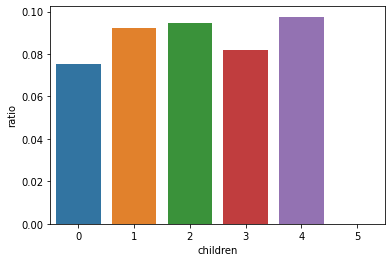

In [24]:
sns.barplot(data = children_debt, x=children_debt.index, y=children_debt['ratio'])

**Вывод:** По графику и из таблицы можно заметить, что при любом количестве детей кроме 5 процентов должников составляет примерно 9%.
Наименьший процент должников среди людей, у которых нет детей - \~7,5%. Наибольший процент - среди людей, у которых 4 ребёнка - \~9,8%. Примерно схожее число должников и среди заёмщиков, у которых 1 ребёнок или 2 ребёнка - 9,2% и 9,5% соответственно.

У заёмщиков, у которых 5 детей нет долгов по кредитам, но при этом выборка для данной категории может быть нерепрезентативной, так как группа состоит всего из 9 человек.

В заключение можно сказать, что прямой зависимости процента должников от количества детей должника не прослеживается.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Создадим по аналогии с предыдущим пунктом сводную таблицу `marriage_debt`. Таблица будет состоять из 3 столбцов:
* `sum` - количество людей, у которых в данный момент есть задолженность
* `count` - количество людей, обладающих определённым семейным положением
* `ratio` - отношение числа должников к общему числу людей в данной категории

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
family_debt = data.pivot_table(index=['family_status_id', 'family_status'], values='debt', aggfunc=['sum', 'count'])
family_debt['ratio'] = family_debt['sum'] / family_debt['count']
family_debt = family_debt.reset_index()
family_debt

,family_status_id,family_status,sum,count,ratio
,,,debt,debt,
0,0,женат / замужем,927,12261,0.075606
1,1,гражданский брак,385,4134,0.093130
2,2,вдовец / вдова,63,951,0.066246
3,3,в разводе,84,1189,0.070648
4,4,Не женат / не замужем,273,2796,0.097639


<AxesSubplot:xlabel='ratio', ylabel='family_status'>

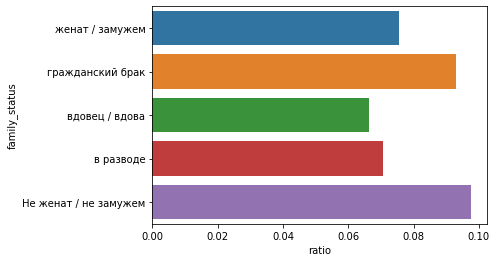

In [26]:
sns.barplot(data=family_debt, x='ratio', y='family_status')

**Вывод:** Больше всего долгов имеют неженатые/незамужние должники (\~10%), меньше всего долгов у вдовцов/вдов (\~6%). Можно заметить, что число должников среди людей, которые ещё не состоят в официально зарегистрированном браке выше, чем у людей, состоящих в браке или состоявших в нём раньше.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Создадим сводную таблицу `income_group_debt`. Таблица будет состоять из 3 столбцов:
* `sum` - количество людей, у которых в данный момент есть задолженность
* `count` - количество людей, обладающих определённым семейным положением
* `ratio` - отношение числа должников к общему числу людей в данной категории

In [27]:
income_group_debt = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=['sum', 'count'])
income_group_debt['ratio'] = income_group_debt['sum'] / income_group_debt['count']
income_group_debt

,sum,count,ratio
,debt,debt,
total_income_category,,,
A,2,25,0.080000
B,354,5014,0.070602
C,1353,15921,0.084982
D,21,349,0.060172
E,2,22,0.090909


<AxesSubplot:xlabel='ratio', ylabel='total_income_category'>

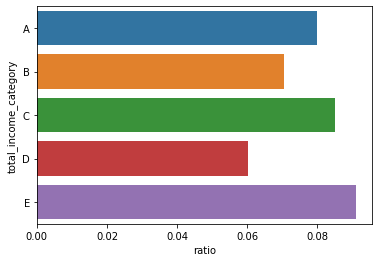

In [28]:
sns.barplot(data=income_group_debt, x='ratio', y=income_group_debt.index)

**Вывод:**
* Больше всего должников среди заёмщиков с категорией доходов E (0-30тыс.р), процент должников \~9%.
* Меньше всего должников среди заёмщиков с категорией доходов D (30-50 тыс.р), процент должников \~6%.
* Возможно при этом выборка является нерепрезентативной для заёмщиков из категорий A и E, так как их всего 25 и 22 человека соответственно. С учётом этого наибольшее число заёмщиков находится в категории C (50-200 тыс.р), процент должников \~8,5%.
* Прямой зависимости процента должников от категории дохода нет.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Создадим сводную таблицу `purpose_debt`. Таблица будет состоять из 3 столбцов:
* `sum` - количество людей, у которых в данный момент есть задолженность
* `count` - количество людей, взявших кредит под определённую цель
* `ratio` - отношение числа должников к общему числу людей в данной категории

In [29]:
purpose_debt = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=['sum', 'count'])
purpose_debt['ratio'] = purpose_debt['sum'] / purpose_debt['count']
purpose_debt

,sum,count,ratio
,debt,debt,
purpose_category,,,
операции с автомобилем,400,4279,0.093480
операции с недвижимостью,780,10751,0.072551
получение образования,369,3988,0.092528
проведение свадьбы,183,2313,0.079118


<AxesSubplot:xlabel='ratio', ylabel='purpose_category'>

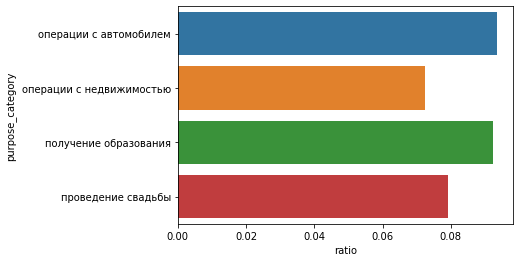

In [30]:
sns.barplot(data=purpose_debt, x='ratio', y=purpose_debt.index)

**Вывод:** 
* Наибольший процент должников среди заёмщиков, берущих кредиты на операции с автомобилем и получение образования (\~9,3% в обеих группах).
* Наименьший процент должников среди заёмщиков, берущих кредит на оперцаии с недвижимостью (\~7,3%).
* Проецнт дожников среди заёмщиков, берущих кредит для проведения свадьбы составляет \~7,9%.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Так как количество пропусков в стобцах `days_employed` и `total_income` совпадает, а также по нахоящемуся в строке 12 в необработанной таблице примеру пропуска можно предположить, что  все пропуски в изначальной таблице двойные. Исходя из этого можем предположить 2 варианта:
1) Это системная ошибка, которая произошла при выгрузке данных значений
2) Заёмщики не предоставили документы, подтверждающие свой рабочий стаж и настоящий доход, потому в таблицах на этих строках пропуски в значениях

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Если данные в таблице имеют нормальное распределение, то медиана будет примерно равна среднему значению. Если же в данных имеются какие-то слишком большие (слишком маленькие) значения, которые сильно отличаются от большинства других, то такие данные сильно повлияют на оценку средним значением, но на медиану не повлияют

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

Было проведено исследование с целью выяснить какие факторы влияют на способность заёмщика не допускать просрочек при погашении кредита. В качестве входных данных использовалась статистика платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга - специальной системы, которая будет оценивать способность потенциального заёмщика возвращать кредит банку.

**Проверяемые гипотезы:**
* Гипотеза 1: количество детей заёмщика влияет на способность заёмщика производить выплаты по кредиту в срок;
* Гипотеза 2: существует зависимость между семейным положением заёмщика и возвратом кредита в срок;
* Гипотеза 3: есть зависимость между уровнем дохода заёмщика и возвратом кредита в срок;
* Гипотеза 4: между целью кредита и его возвратом в срок есть зависимость.

В результате были получены следующие результаты:

**Гипотеза 1 частично подтвердилась:**

В обработанной выборке присутствовали заёмщики без детей и с 1, 2, 3, 4, 5 детьми:
* 7,5% - процент должников среди заёмщиков без детей;
* 9,2% - процент должников среди заёмщиков с 1 ребёнком;
* 9,5% - процент должников среди заёмщиков с 2 детьми;
* 8,2% - процент должников среди заёмщиков с 3 детьми;*
* 9,8% - процент должников среди заёмщиков с 4 детьми;*
* 0,0% (!) - процент должников среди заёмщиков с 5 детьми.*

\* - в данной выборке данные категории скорее всего нерепрезентативны, так как суммарно из 21 тысячи записей во всех этих категориях представлено всего 380 записей.

*Рекоммендации:* провести дополнительное исследование на большей выборке данных для увеличения точности рассчётов для последних 3 категорий.

**Гипотеза 2 подтвердилась:**

* Люди, которые ещё не состояли в официально зарегистрированном браке чаще становятся должниками: 9,3% - доля должников среди заёмщиков, которые находятся в гражданском браке; 9,8% - доля должников среди незамужних/неженатых заёмщиков;
* Люди, которые состоят или состояли в гражданском браке наоборот реже становятся должниками: 7,6% - процент должников среди женатых/замужников заёмщиков; 6,6% - доля должников среди вдов/вдовцов; 7,1% - доля должников среди заёмщиков состоящих в разводе.

**Гипотеза 3 частично подтвердилась:**

В обработанной выборке были представлены люди с различными доходами, которые были разделены на 5 категорий:
* A - категория с доходами более 1 млн руб.;
* B - категория с доходами от 200 тыс. руб. до 1 млн руб.;
* C - категория с доходами от 50 тыс. руб. до 200 тыс. руб.;
* D - категория с доходами от 30 тыс. руб. до 50 тыс. руб.;
* E - категория с доходами до 30 тыс. руб.

Для каждой из категорий были получены следующие результаты:
* 8,0% - доля должников в категории A; **
* 7,1% - доля должников в категории B;
* 8,5% - доля должников в категории C;
* 6,0% - процент должников в категории D;
* 9,1% - процент дожников в категории E. **

** - в категориях A (более 1 млн руб.) и E (менее 30 тыс. руб.) суммарно представлено всего 47 человек, поэтому данные по данным категориям можно считать нерепрезентативными.

*Рекоммендация:* провести дополнительное исследование на большей выборке данных для групп A и E.

**Гипотеза 4 подтвердилась:**

* Заёмщики, которые берут кредит на операции с автомобилем и получение образования чаще становятся должниками: в обеих категориях 9,3% должников;
* Заёмщики, которые берут кредит на операции с недвижимостью и проведение свадьбы реже становятся должниками: 7,3% - доля должников среди заёмщиков, берущи кредит на операции с недвижимостью; 7,9% - процент должников среди заёмщиков, бнрущих кредит на проведение свадьбы.

**Заключение и общие рекоммендации:**

1. При создании системы кредитного скоринга точно можно учитывать семейное положение заёмщика и цель для которой заёмщик берёт кредит, что было проверено в гипотезах 2 и 4;
2. Гипотезы 1 и 3 требуют дополнительно проверки на более широкой выборке.